# **Online Shoppers Purchasing Intention Dataset Analysis**

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

### VISUALISATION

In [160]:
#import what is need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
#importing the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')

In [162]:
#Display the head of the dataframe to understand it
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [163]:
#Types of the columns in the dataframe
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [164]:
#Checking if their is no missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There is no NaN value

In [165]:
#Summary of the dataframe of better understand it
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [166]:
#Understand the target
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

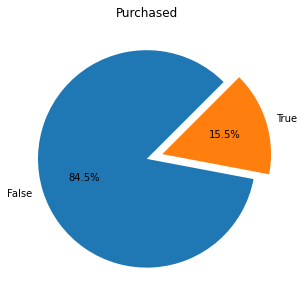

In [167]:
df['Revenue'].value_counts().plot(kind='pie',explode = (0, 0.15),autopct='%1.1f%%',startangle=45)
plt.title('Purchased')
plt.ylabel('')
plt.show()

Only 15.5% of the visitors spent money

Let's see how is the repartition in time and regions

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


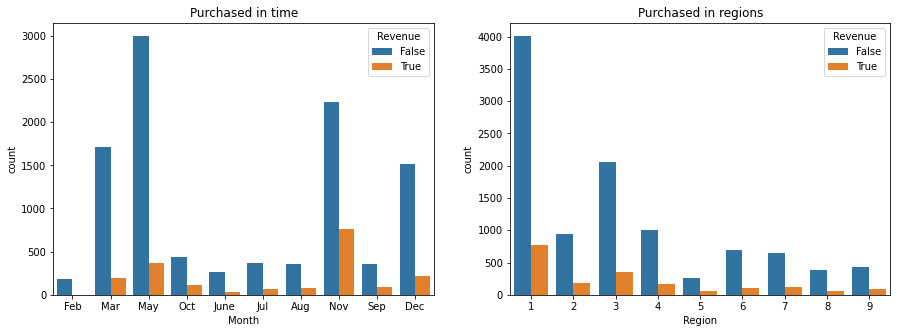

In [168]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(df['Month'],hue=df['Revenue'])
plt.title('Purchased in time')
plt.subplot(1, 2, 2)
sns.countplot(df['Region'],hue=df['Revenue'])
plt.title('Purchased in regions')
plt.show()

4 months are popping out : March, May, November and December. Maybe because of the summer and Christmas holidays

The region 1 is much more present than the others

Let's see the profil of the visitors

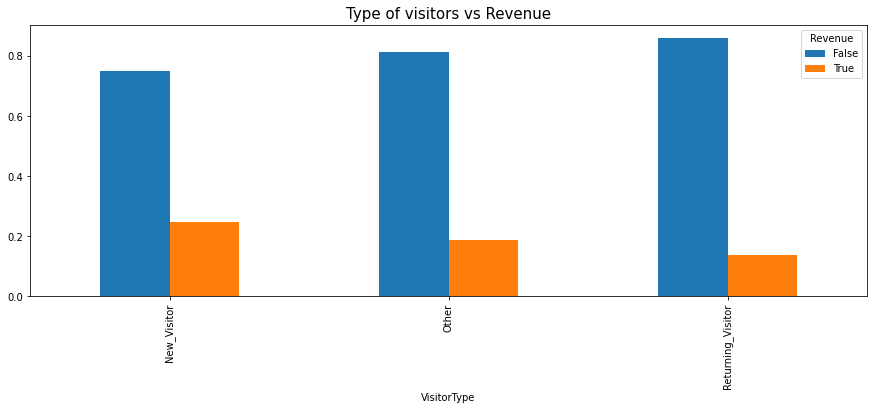

In [169]:
#Type de visiteur vs revenu
data = pd.crosstab(df['VisitorType'], df['Revenue'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar')
plt.title('Type of visitors vs Revenue', fontsize = 15)
plt.show()

It seems that returning visitors are not buying more than the others

Let's display the corrolation between the variables

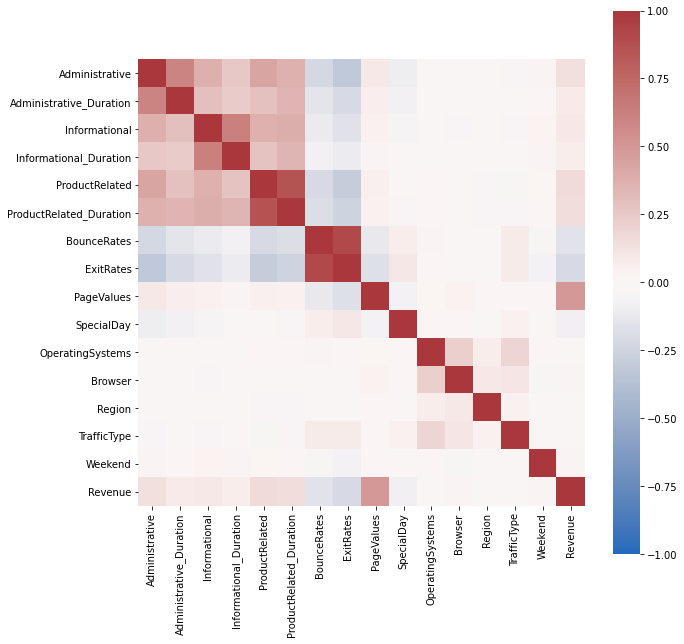

In [170]:
#Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap=sns.color_palette("vlag", as_cmap=True),
            square=True);

plt.show()

We notice a correlation between 'Revenue' and 'PageValues'.
Their is also a strong correlation between 'BounceRates' and 'ExitRates'

In [171]:
#Describing the PageValues variables
df['PageValues'].describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

Let's visualize the correlation between 'Revenue' and 'PageValues'

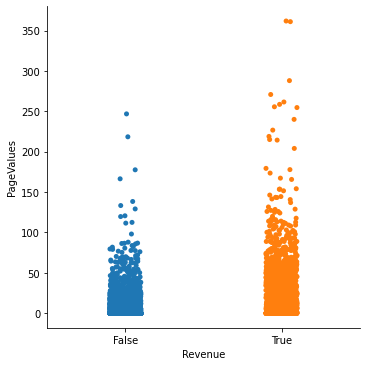

In [172]:
sns.catplot(x='Revenue',y='PageValues',data=df)
plt.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


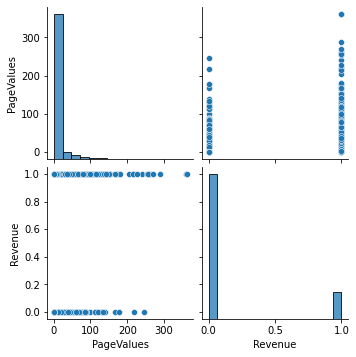

In [173]:
col2 = ['PageValues','Revenue']
# Create the default pairplot
sns.pairplot(df[col2])

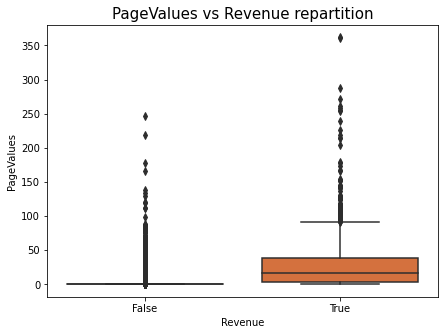

In [174]:
# Revenue vs PageValues
plt.rcParams['figure.figsize'] = (7, 5)
sns.boxplot(x = df['Revenue'], y = df['PageValues'], palette = 'inferno')
plt.title('PageValues vs Revenue repartition', fontsize = 15)
plt.show()

It seems that the higher the PageValues is, the most people are buying

Let's check the repartition between browsers

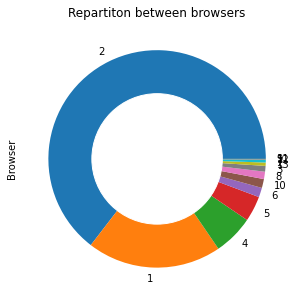

In [175]:
df['Browser'].value_counts().plot(kind='pie')
plt.title('Repartiton between browsers')
circle = plt.Circle((0, 0), 0.6, color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

Most people are using browser 2

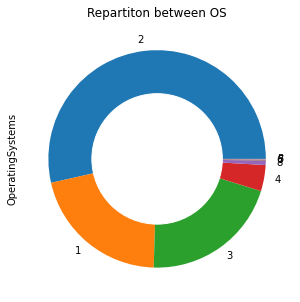

In [176]:
df['OperatingSystems'].value_counts().plot(kind='pie')
plt.title('Repartiton between OS')
circle = plt.Circle((0, 0), 0.6, color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

Most visitors are using the OS 2

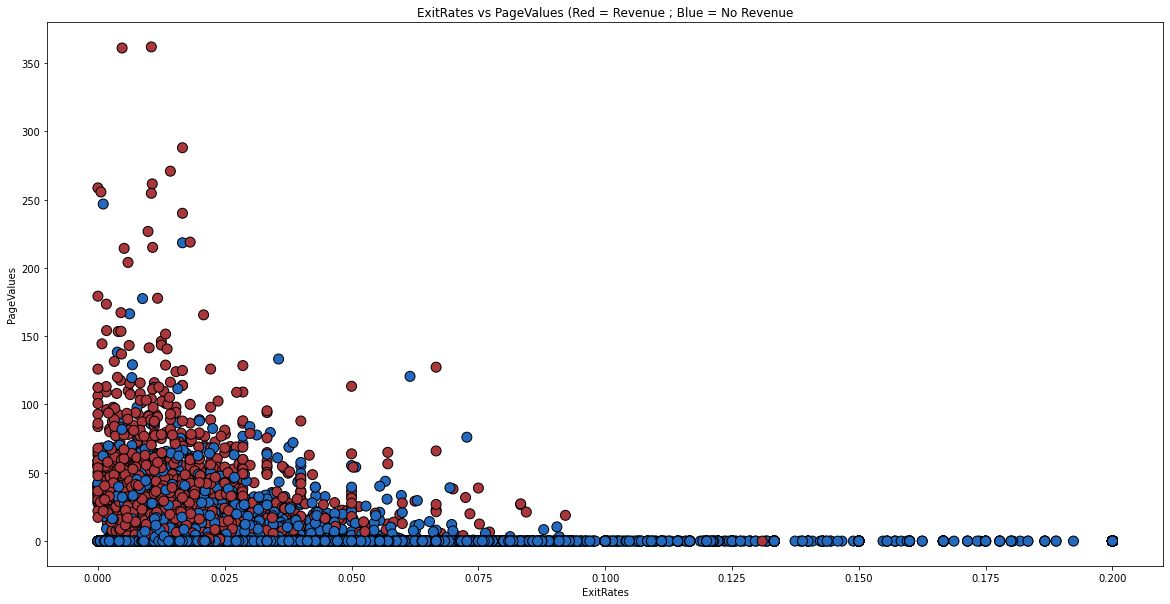

In [177]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(df['ExitRates'],df['PageValues'],
           edgecolor='black',
           s = 100,
           cmap = sns.color_palette("vlag", as_cmap=True),
           c=df['Revenue'])

plt.title('ExitRates vs PageValues (Red = Revenue ; Blue = No Revenue')
plt.xlabel('ExitRates')
plt.ylabel('PageValues')
plt.show()


We notice that the higher the PageValues is, the most people are buying. Also, the higher the ExitRates is, the less people are buying

Text(0.5, 1.0, 'ExitRates in the Months considering Revenue')

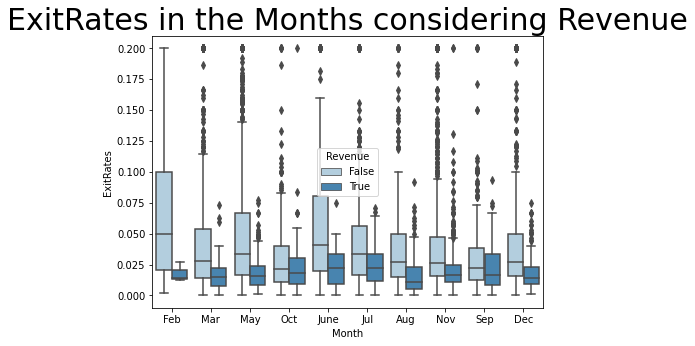

In [178]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Blues')
plt.title('ExitRates in the Months considering Revenue', fontsize = 30)

There is no big difference between the months considering the ExitRates. The pattern is the same all year long

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Revenue')

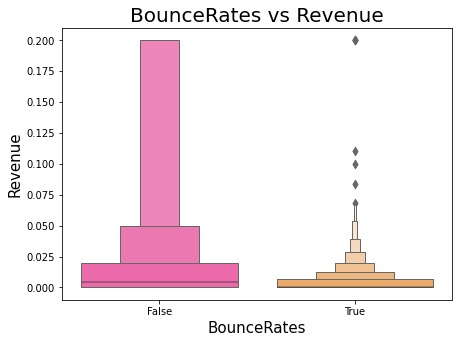

In [179]:
sns.boxenplot(df['Revenue'], df['BounceRates'], palette = 'spring')
plt.title('BounceRates vs Revenue', fontsize = 20)
plt.xlabel('BounceRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

People buying have a much lower BounceRate

### MODELS

**Pre-processing**

In [180]:
#importing what we need
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import numpy as np

In [181]:
# one hot encoding 
data1 = pd.get_dummies(df)

In [182]:
#Transforming the True/False into 1/0
le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue'])

In [183]:
# getting dependent and independent variables
x = data1
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)
y = df['Revenue']

In [184]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

**Modelling**

In [185]:
#RANDOM FOREST
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8940254122735874
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3077
           1       0.76      0.55      0.63       622

    accuracy                           0.89      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.89      0.89      0.89      3699



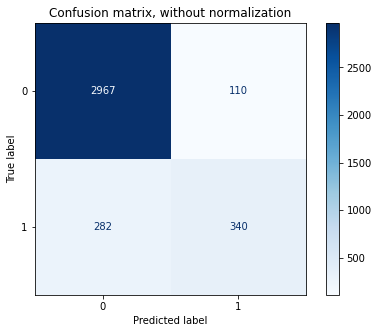

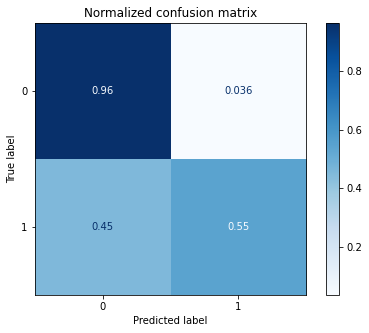

In [186]:
#Confusion matrix
titles_options = [("Confusion matrix, without normalization", None,'1'),
                  ("Normalized confusion matrix", 'true',None)]
for title, normalize,format in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,values_format=format)
    disp.ax_.set_title(title)

plt.show()

In [187]:
#Logistic Regression
logReg = LogisticRegression()
logReg.fit(x_train,y_train)
logReg.predict(x_test)

# evaluating the model
print("Training Accuracy :", logReg.score(x_train, y_train))
print("Testing Accuracy :", logReg.score(x_test, y_test))

Training Accuracy : 0.8859923531456378
Testing Accuracy : 0.8696945120302785


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


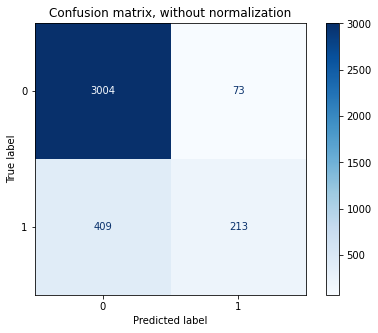

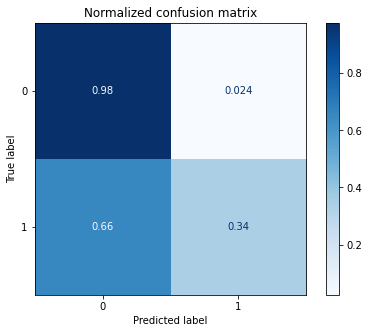

In [188]:
#Confusion matrix
titles_options = [("Confusion matrix, without normalization", None,'1'),
                  ("Normalized confusion matrix", 'true',None)]
for title, normalize,format in titles_options:
    disp = plot_confusion_matrix(logReg, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,values_format=format)
    disp.ax_.set_title(title)

plt.show()

In [189]:
#SVM
SVM = svm.LinearSVC()
SVM.fit(x_train, y_train)
SVM.predict(x_test)

# evaluating the model
print("Training Accuracy :", SVM.score(x_train, y_train))
print("Testing Accuracy :", SVM.score(x_test, y_test))

Training Accuracy : 0.8777661916348047
Testing Accuracy : 0.8577994052446607


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


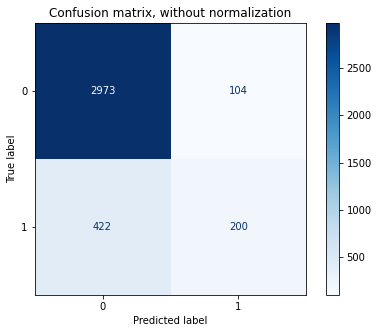

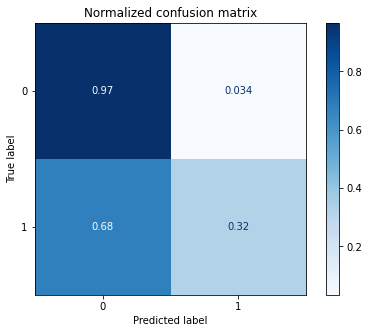

In [190]:
#Confusion matrix
titles_options = [("Confusion matrix, without normalization", None,'1'),
                  ("Normalized confusion matrix", 'true',None)]
for title, normalize,format in titles_options:
    disp = plot_confusion_matrix(SVM, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,values_format=format)
    disp.ax_.set_title(title)

plt.show()

In [191]:
#Naive Bayes
bayes = MultinomialNB()
bayes.fit(x_train,y_train)
bayes.predict(x_test)

# evaluating the model
print("Training Accuracy :", bayes.score(x_train, y_train))
print("Testing Accuracy :", bayes.score(x_test, y_test))

Training Accuracy : 0.8806627273780558
Testing Accuracy : 0.8634766153014328


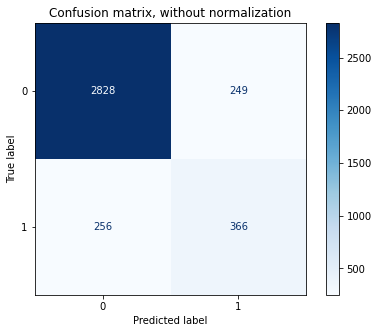

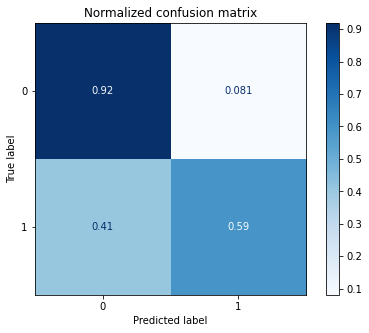

In [192]:
#Confusion matrix
titles_options = [("Confusion matrix, without normalization", None,'1'),
                  ("Normalized confusion matrix", 'true',None)]
for title, normalize,format in titles_options:
    disp = plot_confusion_matrix(bayes, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,values_format=format)
    disp.ax_.set_title(title)

plt.show()

In [193]:
#K-Nearest Neighbors
knns = []
for k in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  knn.predict(x_test)
  knns.append(knn.score(x_test, y_test))

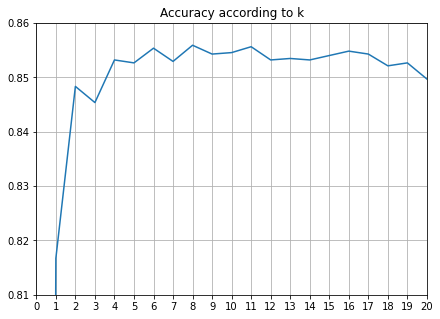

In [194]:
#Plotting accuracy value
values = [0]
values.extend(knns)
plt.plot(values)
plt.grid('on')
plt.xlim(0,20)
plt.ylim(0.81,0.86)
x_ticks = np.arange(0, 21, 1)
plt.xticks(x_ticks)
plt.title("Accuracy according to k")
plt.show()

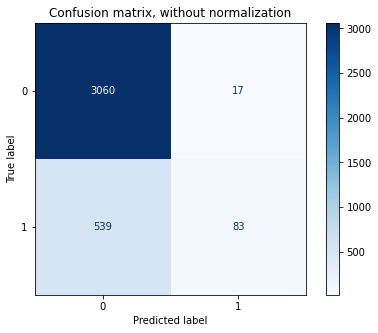

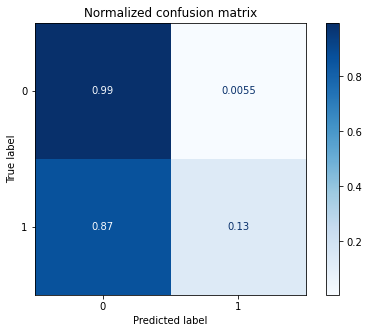

In [195]:
#Confusion matrix
titles_options = [("Confusion matrix, without normalization", None,'1'),
                  ("Normalized confusion matrix", 'true',None)]
for title, normalize,format in titles_options:
    disp = plot_confusion_matrix(knn, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,values_format=format)
    disp.ax_.set_title(title)

plt.show()

In [196]:
##CROSS-VALIDATION
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=2)
#train model
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=10)
#print each fold score and the average
print('Different scores')
print(cv_scores)
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

Different scores
[0.86689815 0.87717265 0.86558517 0.87717265 0.87485516 0.85283893
 0.87022016 0.85515643 0.87253766 0.86326767]
cv_scores mean: 0.8675704637140036


(0.0, 9.0)

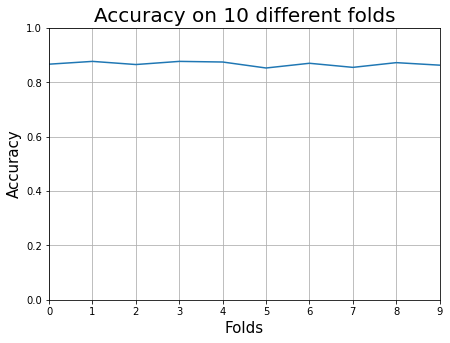

In [197]:
#DIsplay the accuracy of each fold
plt.plot(cv_scores)
plt.grid('on')
plt.xlabel("Folds",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.title("Accuracy on 10 different folds",fontsize=20)
plt.ylim([0, 1])
plt.xlim([0,9])

In [198]:
##GRID SEARCH
#Application du grid search sur un knn
param_grid = dict(n_neighbors=list(range(1, 21)))
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10,scoring='accuracy')
grid_knn.fit(x_train, y_train)

#Affichage du best score et des meilleures paramètres testés
print("Best score : ",grid_knn.best_score_)
print("Best parameters : ",grid_knn.best_params_)

Best score :  0.8695402021372474
Best parameters :  {'n_neighbors': 14}


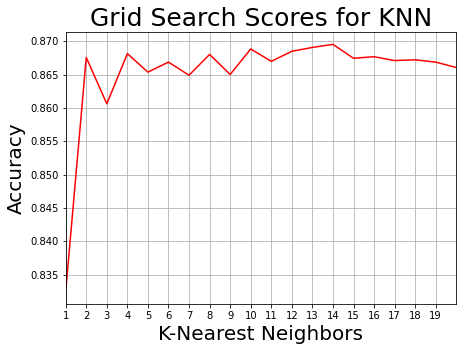

In [199]:
#Display the accuracy of the KNN for each K
plt.plot(grid_knn.cv_results_['param_n_neighbors'].data, grid_knn.cv_results_['mean_test_score'],color='red')
plt.xlabel('K-Nearest Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.grid('on')
plt.title("Grid Search Scores for KNN", fontsize=25)
plt.xlim(1,20)
x_ticks = np.arange(1, 20, 1)
plt.xticks(x_ticks)
plt.show()

##Choose and export the best model

In [200]:
#Export the columns of the dataset
model_columns = list(df.drop(columns='Revenue').columns)
print(model_columns)
joblib.dump(model_columns, 'model_columns.pkl')

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


['model_columns.pkl']

In [201]:
#Display the score of each method to compare them
data = [["Random Forest",model.score(x_test,y_test)],["Logistic Regression",logReg.score(x_test,y_test)],["KNN",knn.score(x_test,y_test)],["SVM",SVM.score(x_test,y_test)],["Naive Bayes",bayes.score(x_test,y_test)],["KNN using Grid Search",grid_knn.best_score_]]
methods = pd.DataFrame(data,columns=["Method","Score"])

methods.set_index('Method', inplace=True)
methods.index.name = None
methods

,Score
Random Forest,0.894025
Logistic Regression,0.869695
KNN,0.849689
SVM,0.857799
Naive Bayes,0.863477
KNN using Grid Search,0.869540


According to this table, the best model is the Random Forest, let's export it

In [202]:
BestModel = model

In [203]:
#Export the best model
joblib.dump(BestModel, 'MyModel.pkl')

['MyModel.pkl']